In [2]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df_temperatura = pd.read_csv('/Users/paoguti/Proyecto-Meteorologico/notebooks/datasets/temperatura.csv')

In [ ]:
# Filtrar los datos del 2023
df_temperatura['fecha'] = pd.to_datetime(df_temperatura['fecha'])
df_temperatura['año'] = df_temperatura['fecha'].dt.year
df_2023 = df_temperatura[df_temperatura['año'] == 2023]

# Detectar outliers con Z-Score
z_scores = stats.zscore(df_2023['tmed'])
outliers_zscore = df_2023[np.abs(z_scores) > 3] 

# Detectar outliers con Tukey's Fence
Q1 = df_2023['tmed'].quantile(0.25)
Q3 = df_2023['tmed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_tukey = df_2023[(df_2023['tmed'] < lower_bound) | (df_2023['tmed'] > upper_bound)]  

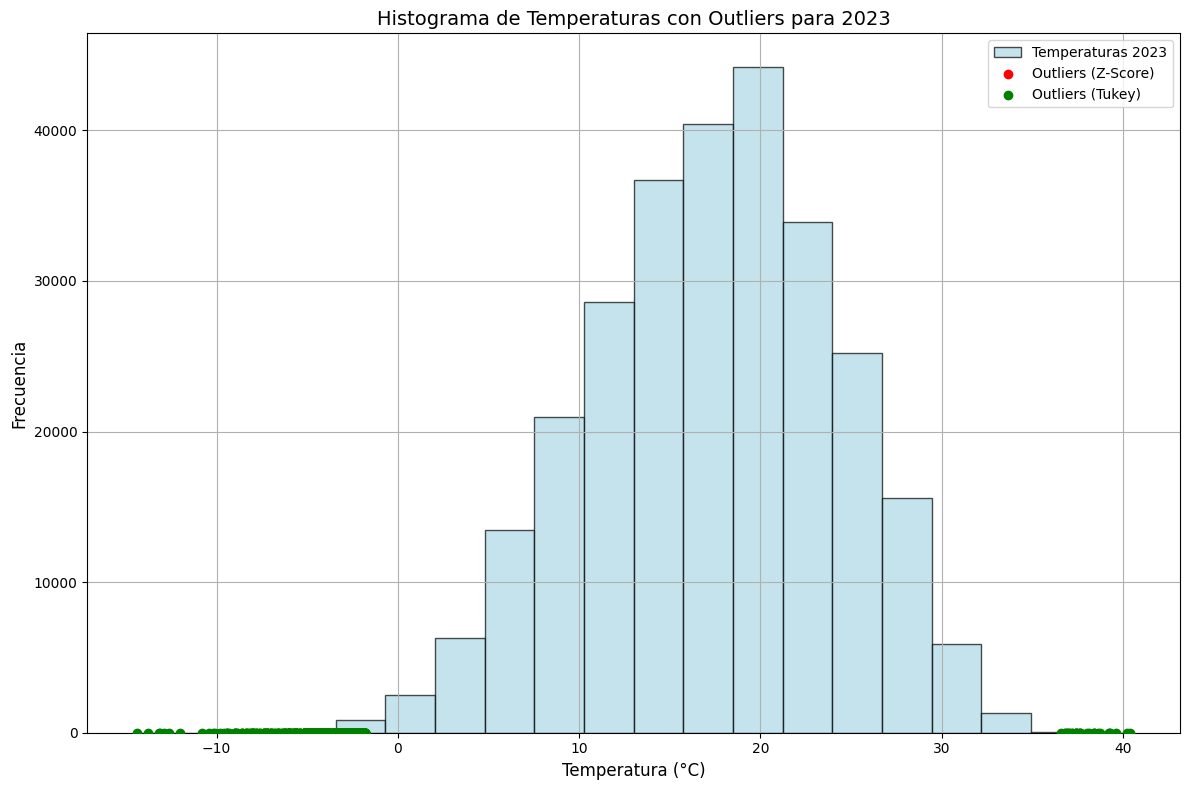

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

# Histograma
ax.hist(df_2023['tmed'], bins=20, color='lightblue', edgecolor='black', alpha=0.7, label='Temperaturas 2023')

# Marcar los outliers detectados por Z-Score y Tukey
ax.scatter(outliers_zscore['tmed'], np.zeros_like(outliers_zscore['tmed']), color='red', label='Outliers (Z-Score)', zorder=5)
ax.scatter(outliers_tukey['tmed'], np.zeros_like(outliers_tukey['tmed']), color='green', label='Outliers (Tukey)', zorder=5)

# Gráfico
ax.set_title('Histograma de Temperaturas con Outliers para 2023', fontsize=14)
ax.set_xlabel('Temperatura (°C)', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()